<a href="https://colab.research.google.com/github/Sailex-Salam/Face-Detection-with-Sailex/blob/main/CatVsDog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pickle
import random
import os
from matplotlib import pyplot as plt
import cv2

In [3]:
directory = r'/content/drive/MyDrive/Data'
categories = ['CAT', 'DOG']

In [1]:
data = []
img_size =100

In [7]:
for category in categories:
  folder = os.path.join(directory , category)
  label = categories.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (img_size, img_size))
    data.append([img_arr, label])

In [8]:
random.shuffle(data)

In [9]:
x = []
y = []

In [10]:
for features, label in data:
  x.append(features)
  y.append(label)

In [11]:
x = np.array(x)
y = np.array(y)

In [12]:
pickle.dump(x,open('x.pkl', 'wb'))
pickle.dump(y,open('y.pkl', 'wb'))

In [13]:
pickle.load(open('x.pkl', 'rb'))
pickle.load(open('y.pkl', 'rb'))

array([0, 1, 0, ..., 1, 0, 1])

In [14]:
x = x/255

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [17]:
model = Sequential()

In [18]:
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,input_shape = x.shape[1:],activation= 'relu'))
model.add(Dense(2,activation = 'softmax'))

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [20]:
model.fit(x,y,epochs = 10 , validation_split = 0.3)

Epoch 1/10
51/51 [==============================] - 54s 1000ms/step - loss: 0.6949 - accuracy: 0.5215 - val_loss: 0.6764 - val_accuracy: 0.5764
Epoch 2/10
51/51 [==============================] - 51s 1s/step - loss: 0.6753 - accuracy: 0.5709 - val_loss: 0.6709 - val_accuracy: 0.5910
Epoch 3/10
51/51 [==============================] - 51s 991ms/step - loss: 0.6503 - accuracy: 0.6190 - val_loss: 0.6505 - val_accuracy: 0.6579
Epoch 4/10
51/51 [==============================] - 50s 988ms/step - loss: 0.6324 - accuracy: 0.6471 - val_loss: 0.6480 - val_accuracy: 0.6477
Epoch 5/10
51/51 [==============================] - 51s 995ms/step - loss: 0.5902 - accuracy: 0.6858 - val_loss: 0.6016 - val_accuracy: 0.6652
Epoch 6/10
51/51 [==============================] - 50s 982ms/step - loss: 0.5506 - accuracy: 0.7277 - val_loss: 0.7077 - val_accuracy: 0.6070
Epoch 7/10
51/51 [==============================] - 49s 959ms/step - loss: 0.6266 - accuracy: 0.6402 - val_loss: 1.1163 - val_accuracy: 0.5924
E

72/72 [==============================] - 17s 240ms/step
The animal is a dog


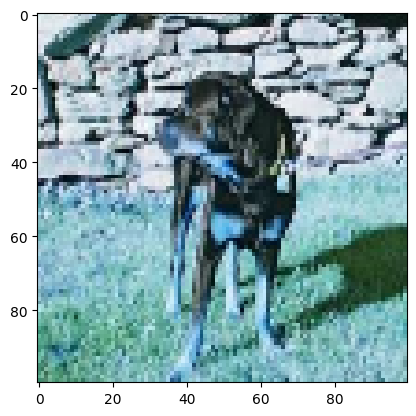

In [28]:
plt.imshow(x[10])
prediction = model.predict(x)
k = np.argmax(prediction[10])
if k ==0:
  print("The animal is a cat")
elif k ==1:
  print("The animal is a dog")
else:
  None